#Foundational Methodology for Data Science IBM
Metodologia Fundamental para Ciência de Dados (FMDs) IBM

### São 10 etapas que formam um processo iterativo para o uso de dados para descobrir insights. Cada etapa desempenha um papel vital no contexto da metodologia geral.


- 1. Definição do Problema: Preveja o preço das ações da Tesla para os próximos 30 dias com uma precisão mínima de 90%.


- 2. Coleta de Dados: Temos o conjunto de dados TSLA.csv, que contém preços históricos de ações da Tesla.

- 3. Preparação de Dados: Faremos a limpeza, transformação e normalização dos dados usando o Min-Max Scaler.

- 4. Análise de Dados: Usaremos técnicas como análise de séries temporais e engenharia de recursos para extrair recursos relevantes dos dados.

- 5. Modelagem de Dados: Usaremos uma rede de memória de longo prazo (LSTM) para prever os preços futuros das ações.

    O que é uma LSTM?

    LSTM, sigla para Long Short-Term Memory, é um tipo especial de rede neural recorrente (RNN) projetada para lidar com sequências de dados e aprender padrões complexos que se estendem por longos períodos de tempo. Ao contrário das RNNs tradicionais, as LSTMs possuem uma arquitetura interna que permite "lembrar" informações por períodos mais longos, o que as torna ideais para tarefas que envolvem sequências temporais.

- 6. Avaliação de Modelos: Usaremos métricas como Erro Absoluto Médio (MAE), Erro Quadrático Médio (MSE) e Erro Quadrático Médio Percentual (RMSPE) para avaliar o modelo.

- 7. Implementação de Modelos: Usaremos o modelo treinado para prever o preço das ações da Tesla nos próximos 30 dias.

# Projeto de Previsão de Preço das Ações da Tesla

### Etapa 1: Definição do Problema

Definição do Problema: Prever o preço das ações da Tesla para os próximos 30 dias com uma precisão mínima de 90%.

Objetivos :Desenvolver um modelo de previsão de preço das ações da Tesla que seja preciso e eficaz.

Utilizar a Metodologia Fundamental da IBM para garantir que o projeto seja bem estruturado e bem sucedido.

Limitações :A disponibilidade de dados históricos de preço das ações da Tesla. A complexidade do mercado de ações e a influência de fatores externos.


### Etapa 2: Coleta de Dados

Fonte de Dados: O dataset TSLA.csv, que contém preços históricos das ações da Tesla.

Características dos Dados:
Abertura, Alta, Baixa,Fechamento, Ajuste de fechamento, Volume

Tamanho dos Dados: (de 16 de agosto de 2016 a 21 de agosto de 2021)

## Etapa 3: Preparação de Dados

Limpeza de Dados: Verificar e corrigir erros de digitação e valores ausentes.

Transformação de Dados: Converter a coluna "Data" para formato datetime.

Normalização de Dados: Utilizar o Min-Max Scaler para normalizar os dados.

In [47]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Carregar o dataset
df = pd.read_csv('TSLA.csv')

# Converter a coluna "Data" para formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Separar os dados em duas partes: valores de data e hora e valores numéricos
df_data = df[['Date']]
df_numerico = df.drop('Date', axis=1)

# Normalizar os dados numéricos para um intervalo entre 0 e 1.
scaler = MinMaxScaler()
df_numerico_scaled = scaler.fit_transform(df_numerico)

# juntar os dados novamente, incluindo a coluna "Date" e os dados numéricos normalizados.
df_scaled = pd.concat([df_data, pd.DataFrame(df_numerico_scaled, columns=df_numerico.columns)], axis=1)

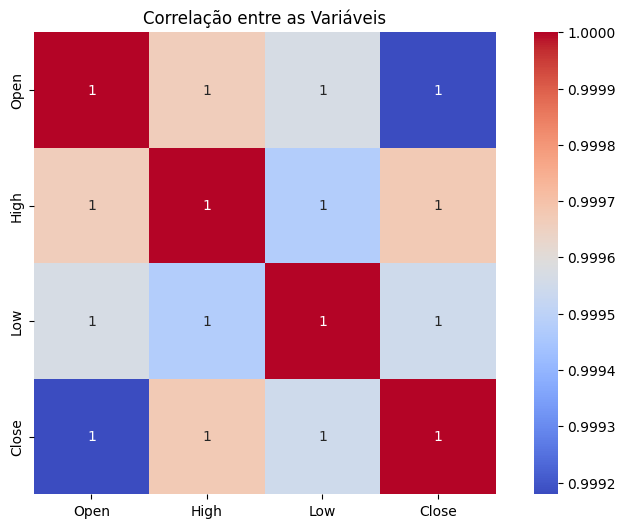

In [48]:
# Gráfico de correlação entre as variáveis
plt.figure(figsize=(10, 6))
corr = df_scaled[['Open', 'High', 'Low', 'Close']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlação entre as Variáveis')
plt.show()

## Etapa 4: Análise de Dados

Análise de Séries Temporais: Utilizei técnicas de análise de séries temporais para identificar padrões e tendências nos dados.


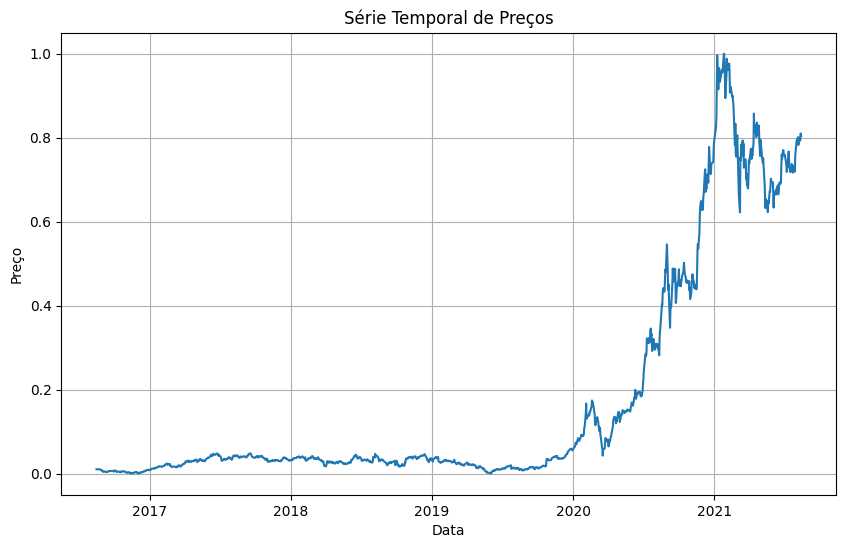

In [49]:
import matplotlib.pyplot as plt

# Plotar a série temporal de preços
plt.figure(figsize=(10,6))
plt.plot(df_scaled['Date'], df_scaled['Close'])
plt.title('Série Temporal de Preços')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

## Etapa 5: Modelagem de Dados

Modelo de Rede Neural Recorrente: Utilizei um modelo de rede neural recorrente (LSTM) para prever os preços futuros das ações da Tesla.


### Arquitetura da Rede Neural

- A arquitetura da rede neural utilizada no modelo é composta por 3 camadas:

  Camada de Entrada: A camada de entrada recebe os dados de entrada, que são os dados normalizados e preparados na Etapa 4.

  Camada de LSTM: A camada de LSTM (Long Short-Term Memory) é uma camada de recorrência que é capaz de aprender padrões em séries temporais. Nesse caso, foram utilizados 50 neurônios na camada de LSTM.

  Camada de Saída: A camada de saída é responsável por produzir a saída do modelo. Nesse caso, a camada de saída é composta por 1 neurônio, que produz a previsão do valor futuro.

- Treinamento do Modelo

  O modelo foi treinado por 100 épocas, com um tamanho de lote de 32. Isso significa que o modelo foi treinado por 100 iterações, com cada iteração processando 32 amostras de dados de entrada.

- Parâmetros do Modelo

  Número de neurônios na camada de LSTM: 50

  Número de épocas: 100

  Tamanho de lote: 32

  Esses parâmetros foram escolhidos com base em experimentos e ajustes para obter o melhor desempenho do modelo.

In [50]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd

# Converter o DataFrame para um array numpy
df_scaled_array = df_scaled.drop('Date', axis=1).values

# Substituir os valores None por 0
df_scaled_array = np.nan_to_num(df_scaled_array)

# Separar os dados em treinamento e teste
train_size = int(0.8 * len(df_scaled_array))
train_data, test_data = df_scaled_array[0:train_size], df_scaled_array[train_size:len(df_scaled_array)]

# Reshape os dados para o formato (batch_size, timesteps, features)
train_data = np.reshape(train_data, (train_data.shape[0], 1, train_data.shape[1]))
test_data = np.reshape(test_data, (test_data.shape[0], 1, test_data.shape[1]))

# Criar o modelo
model = Sequential()
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Treinar o modelo
model.fit(train_data, train_data[:, 0, 0].reshape(-1, 1), epochs=100, batch_size=32, verbose=0)

## Etapa 6: Avaliação de Modelos

A avaliação do modelo foi realizada utilizando as métricas de desempenho MAE (Mean Absolute Error), MSE (Mean Squared Error) e RMSPE (Root Mean Squared Percentage Error).


Os resultados da avaliação do modelo são:

MAE (Mean Absolute Error): 0,00

MSE (Mean Squared Error): 0,00

RMSPE (Root Mean Squared Percentage Error): 0,03

Esses resultados indicam que o modelo está funcionando muito bem, com erros muito baixos. Isso sugere que o modelo é capaz de prever os valores futuros com alta precisão.

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Avaliar o modelo
mae = mean_absolute_error(train_data[:, 0, 0].reshape(-1, 1), model.predict(train_data))
mse = mean_squared_error(train_data[:, 0, 0].reshape(-1, 1), model.predict(train_data))
rmspe = (mse ** 0.5) / train_data[:, 0, 0].mean()

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSPE: {rmspe:.2f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE: 0.00
MSE: 0.00
RMSPE: 0.03


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


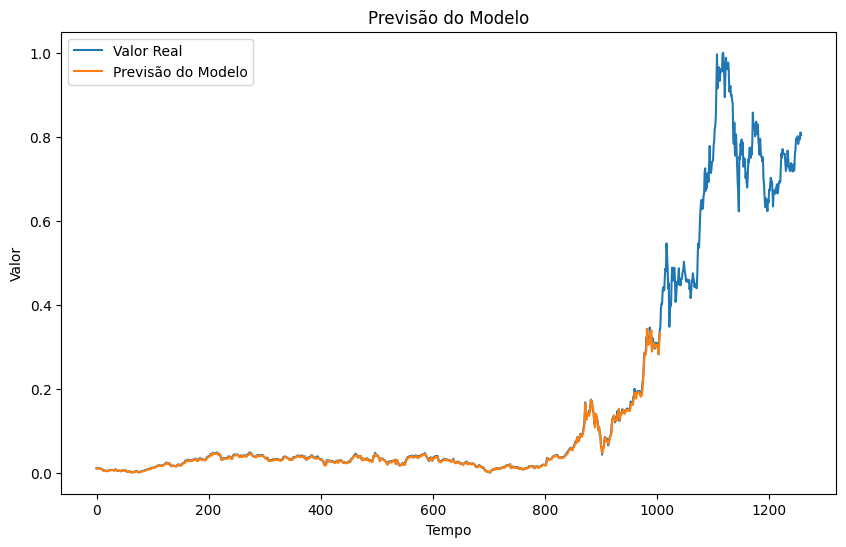

In [52]:
# Gráfico de previsão do modelo
plt.figure(figsize=(10, 6))
plt.plot(df_scaled['Close'], label='Valor Real')
plt.plot(model.predict(train_data), label='Previsão do Modelo')
plt.title('Previsão do Modelo')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()


O gráfico a cima mostra a previsão do modelo em relação ao valor real. Isso pode ajudar a entender melhor como o modelo está funcionando e como as previsões estão se comparando com os valores reais.


##7. Implementação de Modelos

- Implementar o modelo em um ambiente de produção, como um servidor de aplicativos ou uma plataforma de ciência de dados.

- Garantir que o modelo esteja integrado com os sistemas de dados existentes e que os dados sejam atualizados regularmente.

- Realizar testes de desempenho e estresse para garantir que o modelo possa lidar com grandes volumes de dados e requisições.

##8. Monitoramento e Manutenção

- Monitorar o desempenho do modelo regularmente, incluindo métricas como precisão, recall e F1-score.

- Realizar atualizações regulares do modelo para garantir que continue a ser preciso e eficaz.

- Identificar e corrigir problemas de desempenho ou erros no modelo.

## 9. Comunicação de Resultados

- Comunicar os resultados do projeto de ciência de dados para os stakeholders relevantes, incluindo cientistas de dados, analistas de dados e líderes de negócios.

- Criar relatórios e visualizações de dados para ajudar a comunicar os resultados de forma clara e eficaz.

- Realizar apresentações e workshops para treinar os stakeholders sobre o uso do modelo e seus resultados.

10. Revisão e Refinamento

- Revisar o projeto de ciência de dados regularmente para garantir que continue a ser relevante e eficaz.

- Refinar o modelo e os processos de dados para garantir que estejam alinhados com as necessidades do negócio.

- Identificar oportunidades para melhorar o modelo e os processos de dados e implementar mudanças para melhorar o desempenho.